In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [119]:
df = pd.read_csv("credit_card.csv")

In [107]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Data processing

### rename columns

In [120]:
# rename the column
# ca_trx is changed into _transaction_number
# purchases_trx is changed into puchase_transaction_number
df.columns = ['cust_id', 'balance', 'balance_frequency', 
              'purchase', 'oneoff_purchase', 'installment_purchase', 'cash_advance', 
              'purchase_frequency', 'oneoff_purchase_frequency',
              'purchase_installment_frequency', 'cash_advance_frequency',
               'cash_advance_transaction_number', 'purchase_transaction_number',
               'credit_limit', 'payment', 'minimum_payment', 'percent_full_payment','tenure']

In [5]:
df

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_transaction_number,puchase_transaction_number,credit_limit,payments,minimum_payments,percent_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchase_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_transaction_number', 'puchase_transaction_number',
       'credit_limit', 'payments', 'minimum_payments', 'percent_full_payment',
       'tenure'],
      dtype='object')

drop cust_id column

In [121]:
df = df.drop('cust_id', axis=1)

### type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchase_frequency         8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_transaction_number   8950 non-null   int64  
 11  puchase_transaction_number        8950 non-null   int64  
 12  credit

### missing values

In [9]:
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchase_frequency             0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_transaction_number       0
puchase_transaction_number            0
credit_limit                          1
payments                              0
minimum_payments                    313
percent_full_payment                  0
tenure                                0
dtype: int64

In [122]:
df.dropna(subset = ["credit_limit"], inplace = True)
df

,balance,balance_frequency,purchase,oneoff_purchase,installment_purchase,cash_advance,purchase_frequency,oneoff_purchase_frequency,purchase_installment_frequency,cash_advance_frequency,cash_advance_transaction_number,purchase_transaction_number,credit_limit,payment,minimum_payment,percent_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [111]:
df.loc[df["minimum_payment"].isnull()]

,balance,balance_frequency,purchase,oneoff_purchase,installments_purchase,cash_advance,purchase_frequency,oneoff_purchase_frequency,purchase_installment_frequency,cash_advance_frequency,cash_advance_transaction_number,purchase_transaction_number,credit_limit,payment,minimum_payment,percent_full_payment,tenure
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


(0.0, 5000.0)

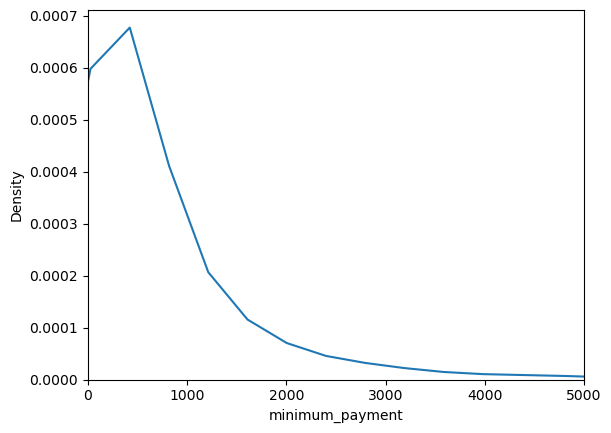

In [112]:
ax = sns.kdeplot(data=df, x="minimum_payment")
ax.set_xlim(0, 5000)

Judging from the density plot, it is right skewed. The mdedian is a better choice than the mean

In [123]:
df['minimum_payment'].fillna(df['minimum_payment'].median(), inplace = True)

In [114]:
df.isnull().sum()

balance                            0
balance_frequency                  0
purchase                           0
oneoff_purchase                    0
installments_purchase              0
cash_advance                       0
purchase_frequency                 0
oneoff_purchase_frequency          0
purchase_installment_frequency     0
cash_advance_frequency             0
cash_advance_transaction_number    0
purchase_transaction_number        0
credit_limit                       0
payment                            0
minimum_payment                    0
percent_full_payment               0
tenure                             0
dtype: int64

In [15]:
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_transaction_number,puchase_transaction_number,credit_limit,payments,minimum_payments,percent_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.452292,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Outliers and distribution

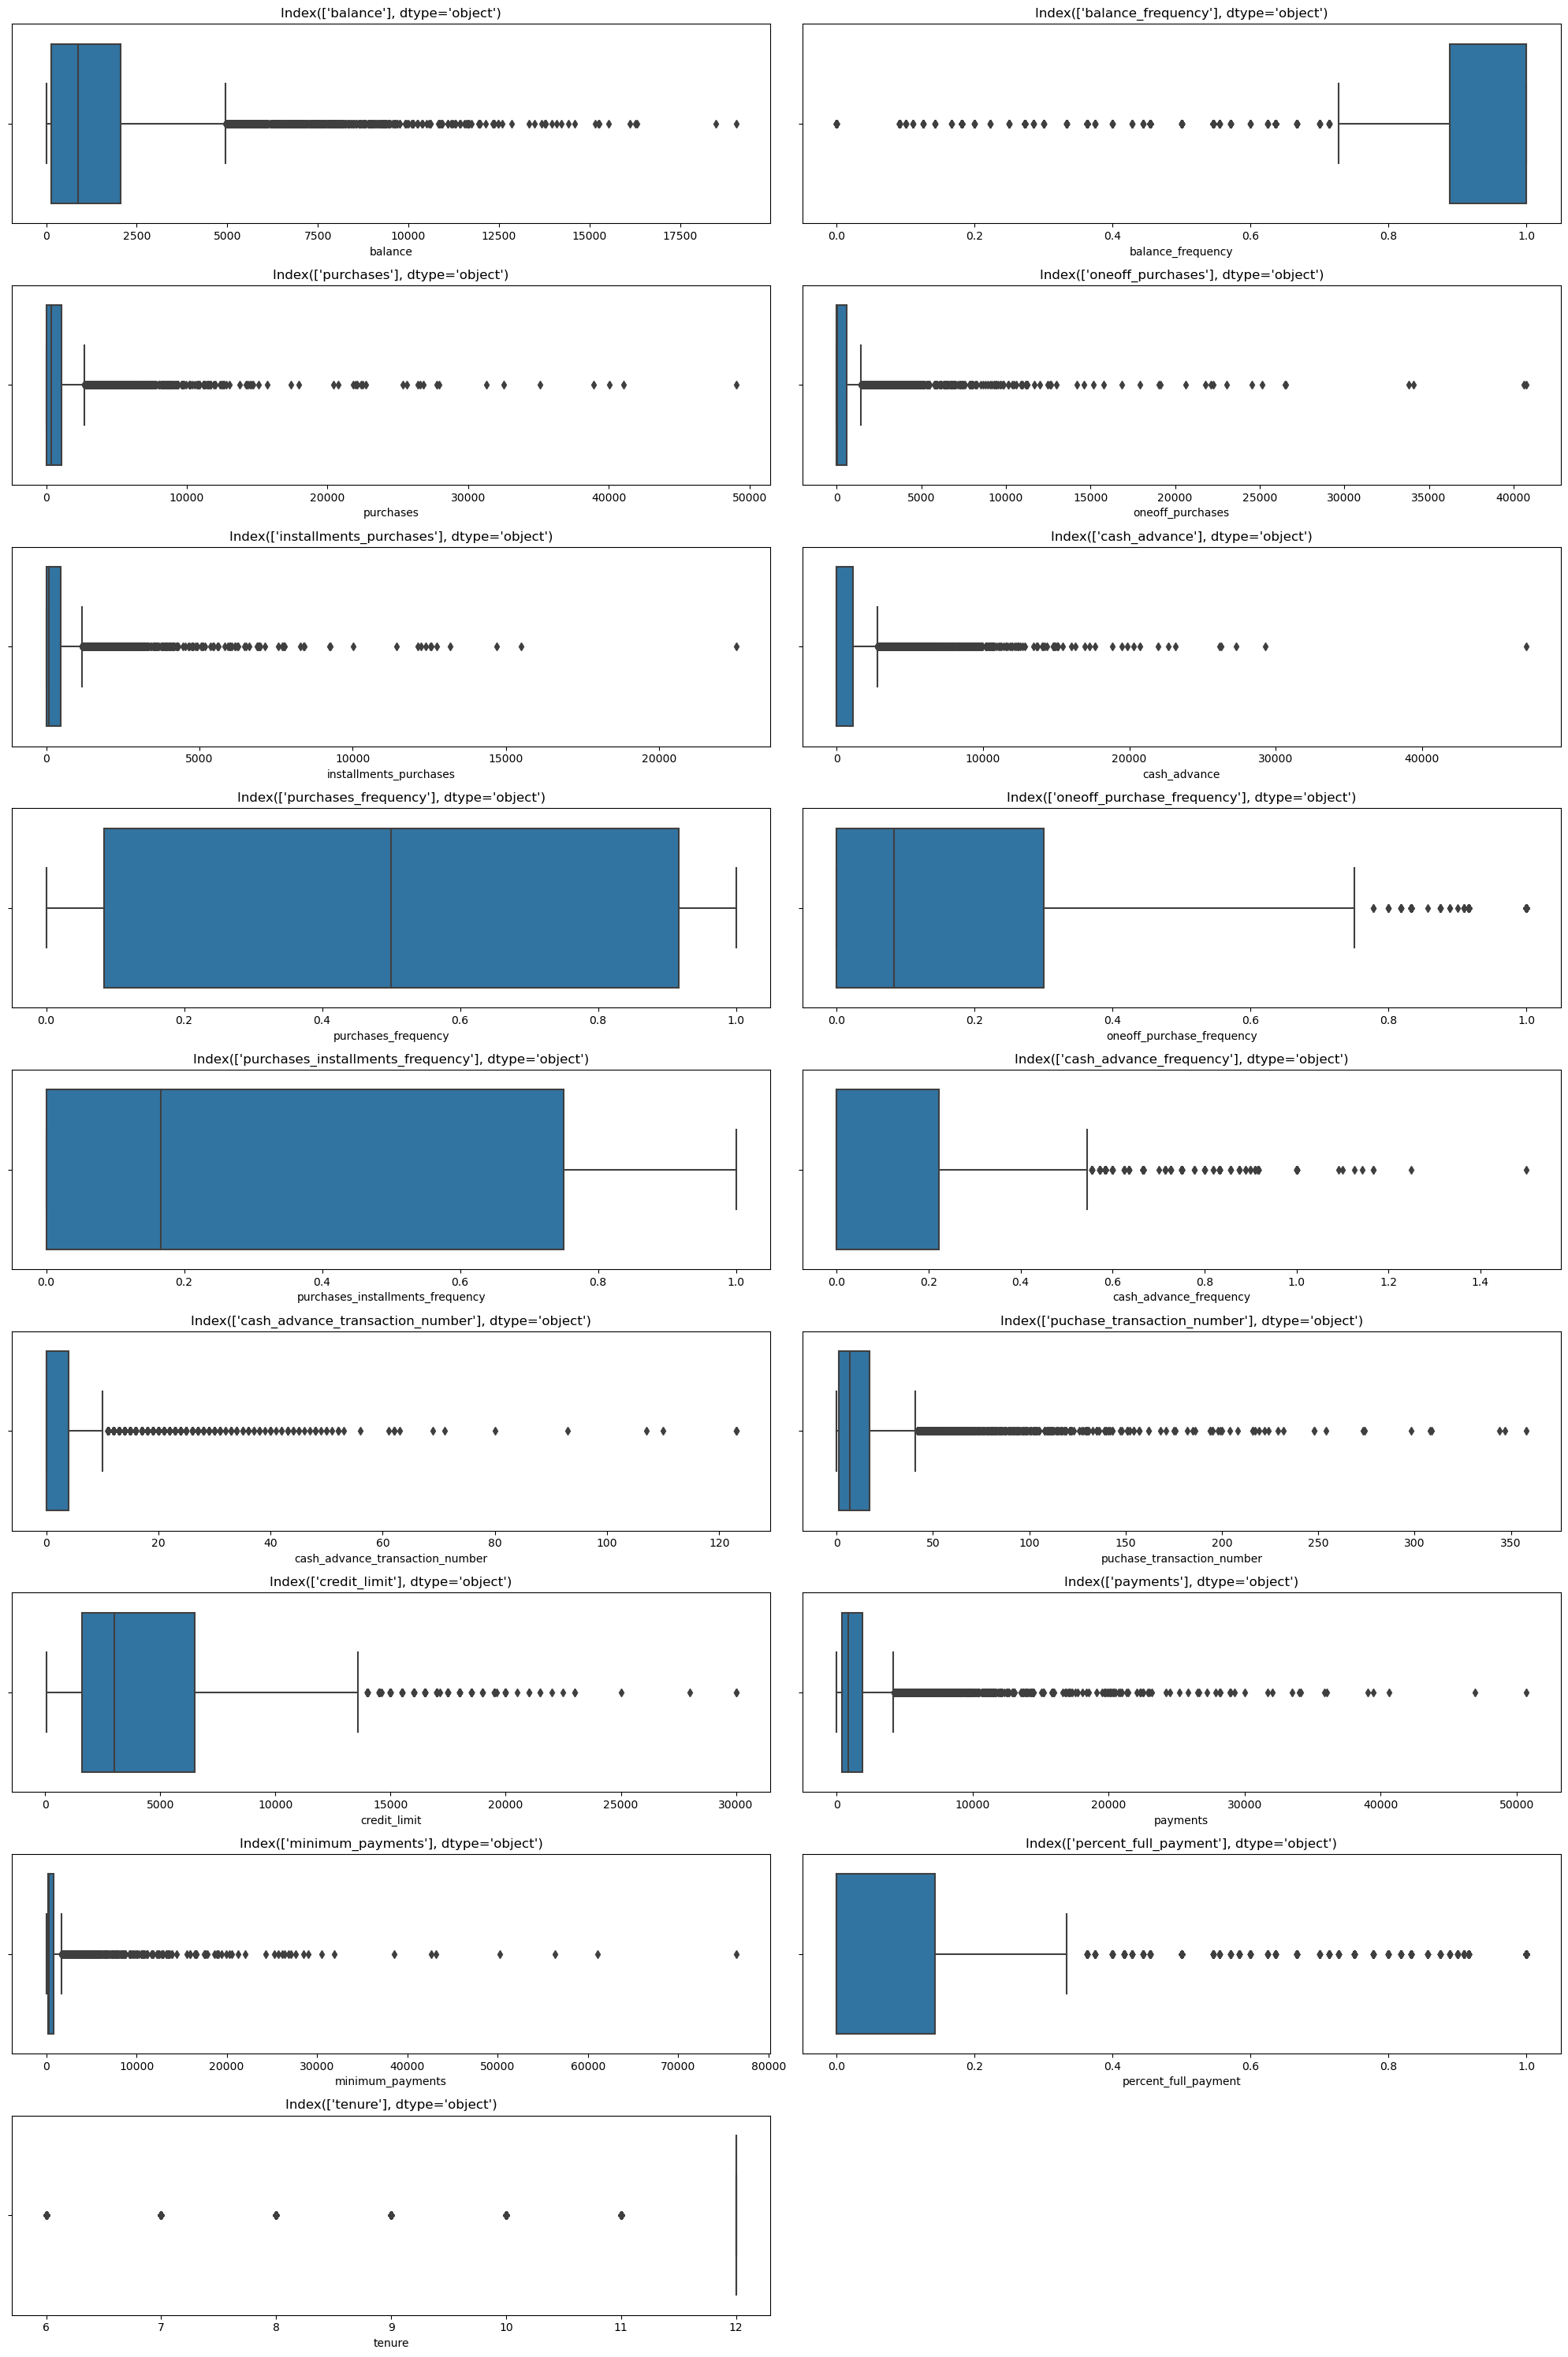

In [16]:
plt.figure(figsize=(20, 30))
for i in range(len(df.columns)):
    plt.subplot(9,2,i+1)
    sns.boxplot(x = df.columns[i], data=df)
    plt.title(df.columns[[i]])
plt.tight_layout()              

Okay, too many outliers, can't drop them all.
Let's futher check the statistics data and distribution

In [17]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_transaction_number,puchase_transaction_number,credit_limit,payments,minimum_payments,percent_full_payment,tenure
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


lots of 0 values, may requiring checking

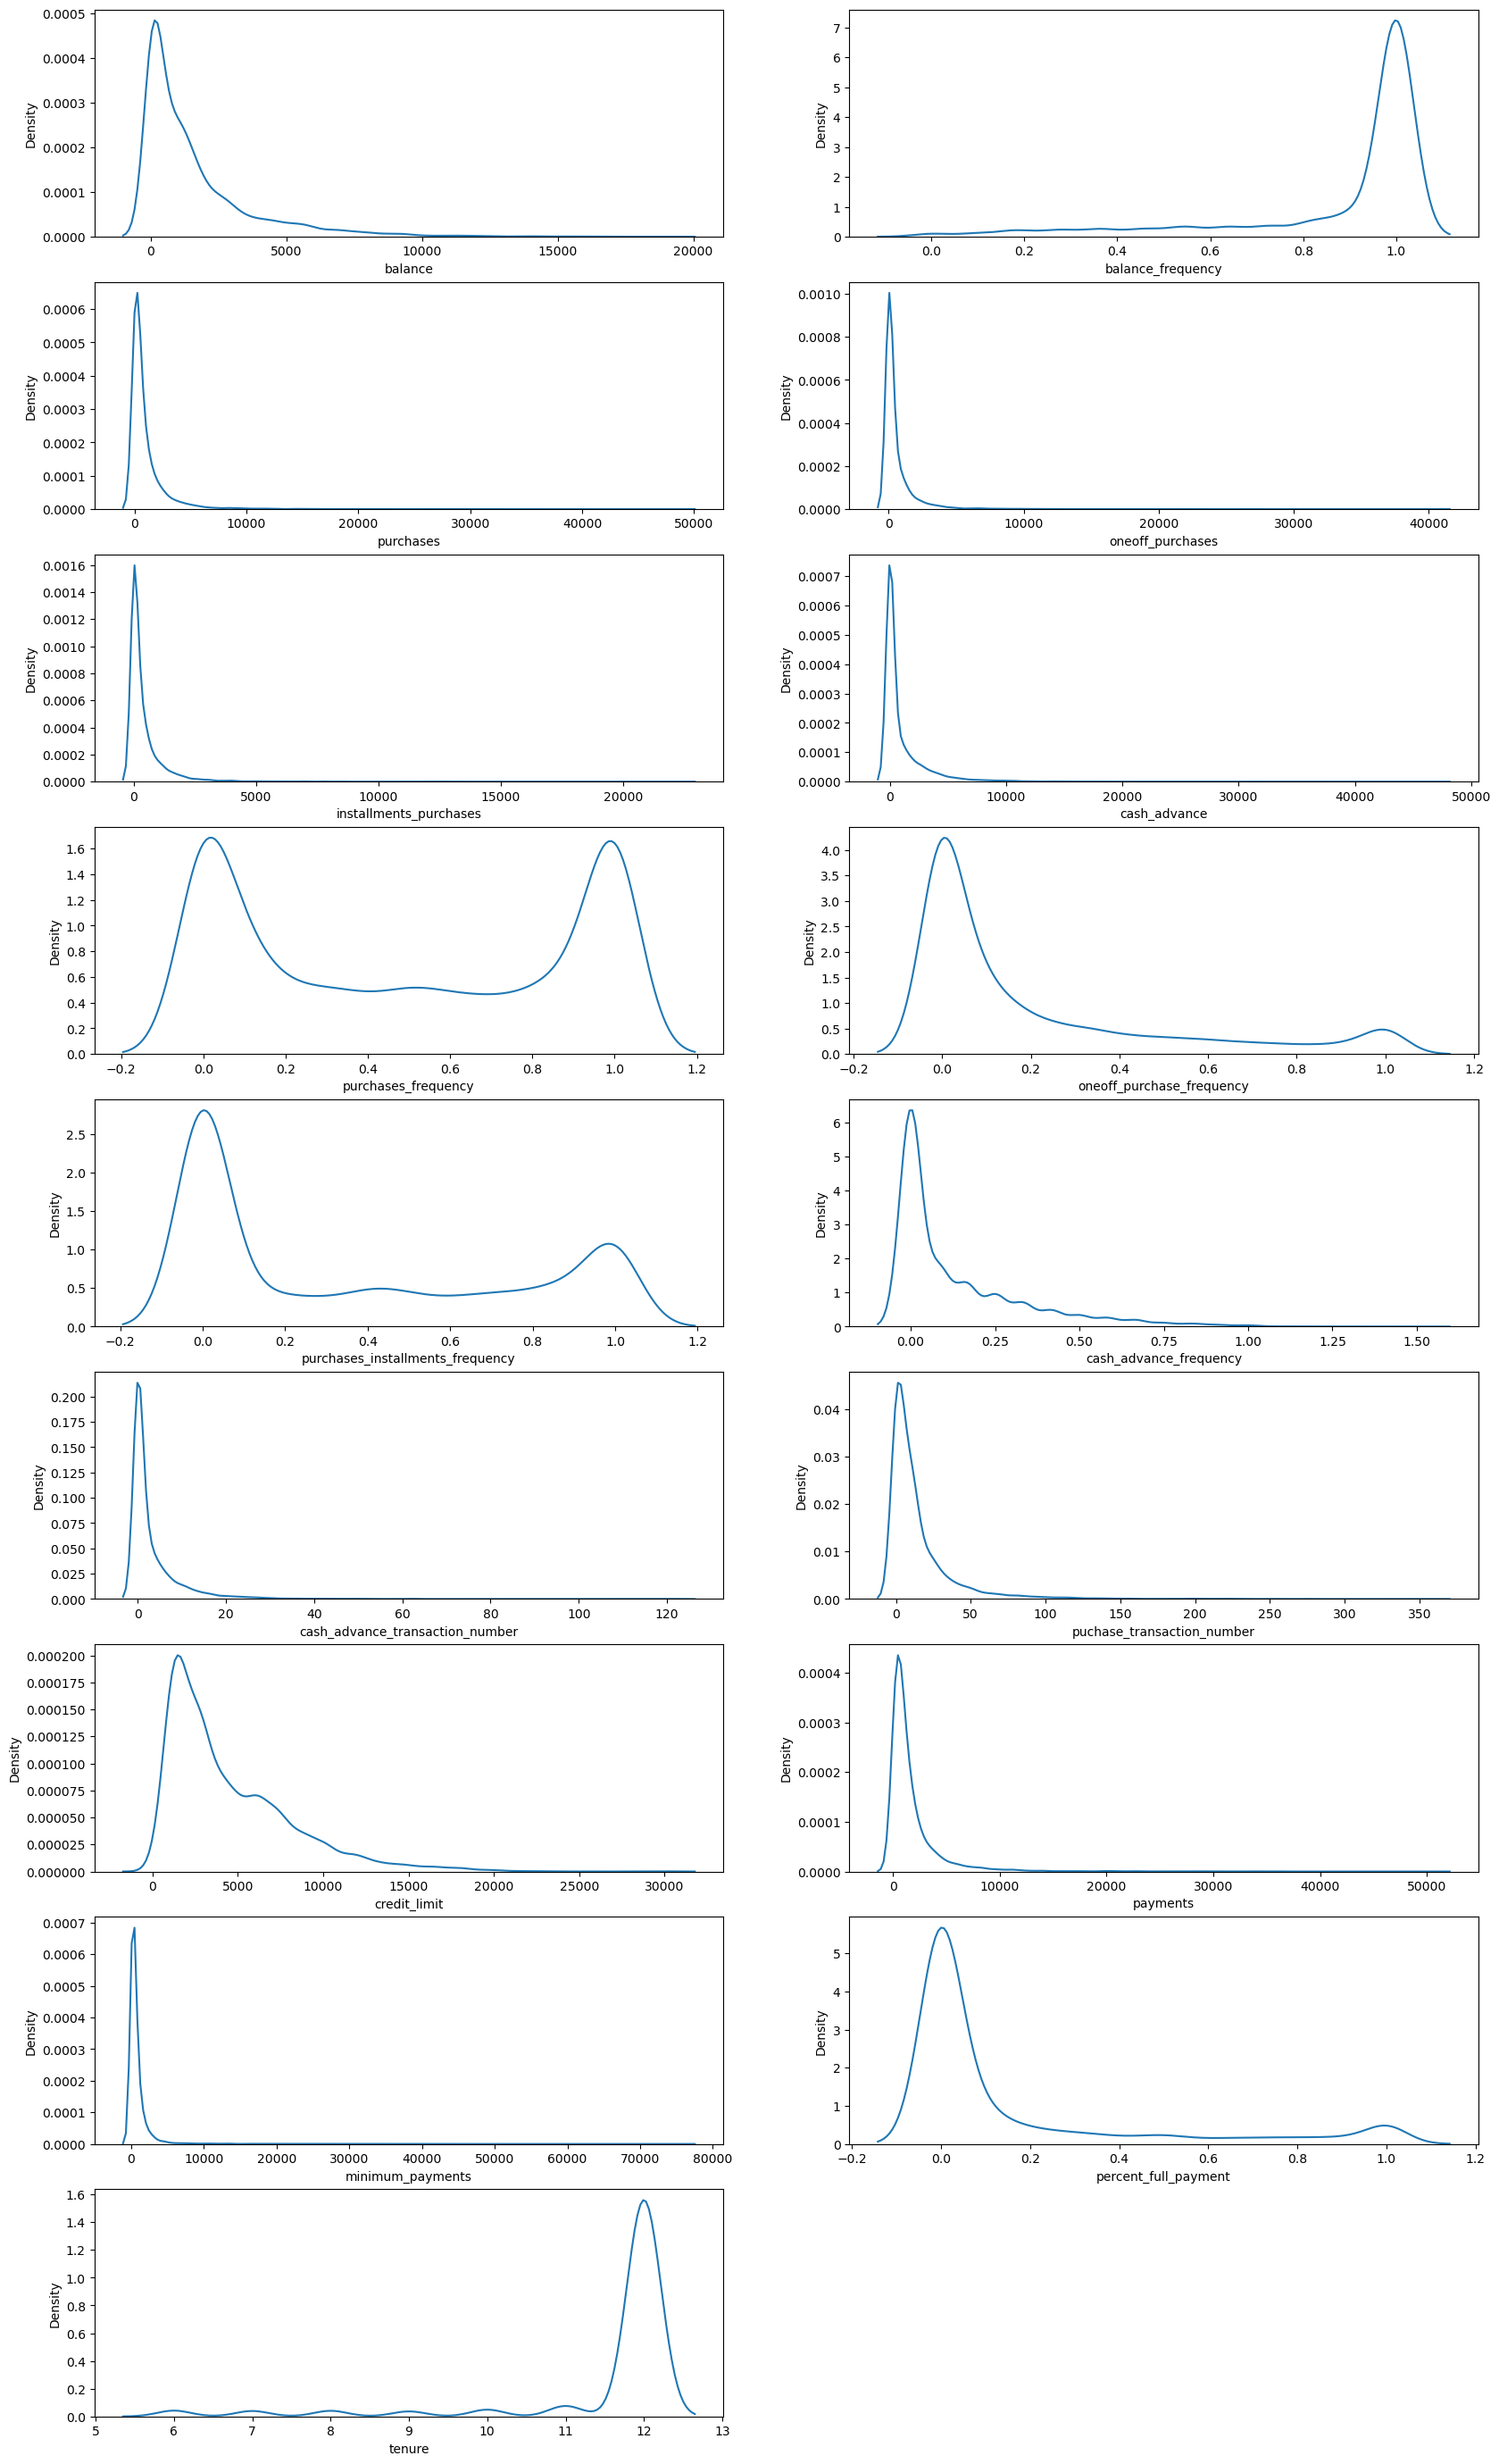

In [18]:
plt.figure(figsize=(20, 35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax = ax)

* They are skewed. But in reality, it is expected that few people that are really rich will twisted the distribution of money spent.
* So, the outliers are not gonna be dealt the with and the skewness of the distributions for columns is not a problem.

#### Conclusion about outliers and distributions 

* The aim of the process is to find clusters and interpret clusters to extract information from the different groups. 
* It is not a classification problem where outliers and normalization highly affect the accuracy of the model prediction.
* Therefore, both outliers and distribution will not be dealt with, but to reduce the effect of these outliers for cluster models that computing distances, normalization will be done in the model part.

### Standardization

* I don't want to change the distribution much. I want to limit the information loss in the mormalization process to minimum. 
* Therefore, compared to standardscaler, minmaxscaler is a better choice since it only changes the range

In [115]:
X = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
X

,balance,balance_frequency,purchase,oneoff_purchase,installments_purchase,cash_advance,purchase_frequency,oneoff_purchase_frequency,purchase_installment_frequency,cash_advance_frequency,cash_advance_transaction_number,purchase_transaction_number,credit_limit,payment,minimum_payment,percent_full_payment,tenure
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004089,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8945,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.004089,0.000000,0.0
8946,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8947,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [ ]:
plt.figure(figsize=(20, 35))
for i, col in enumerate(X.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(X[col], ax = ax)

## Exploratory data analysis

<AxesSubplot: >

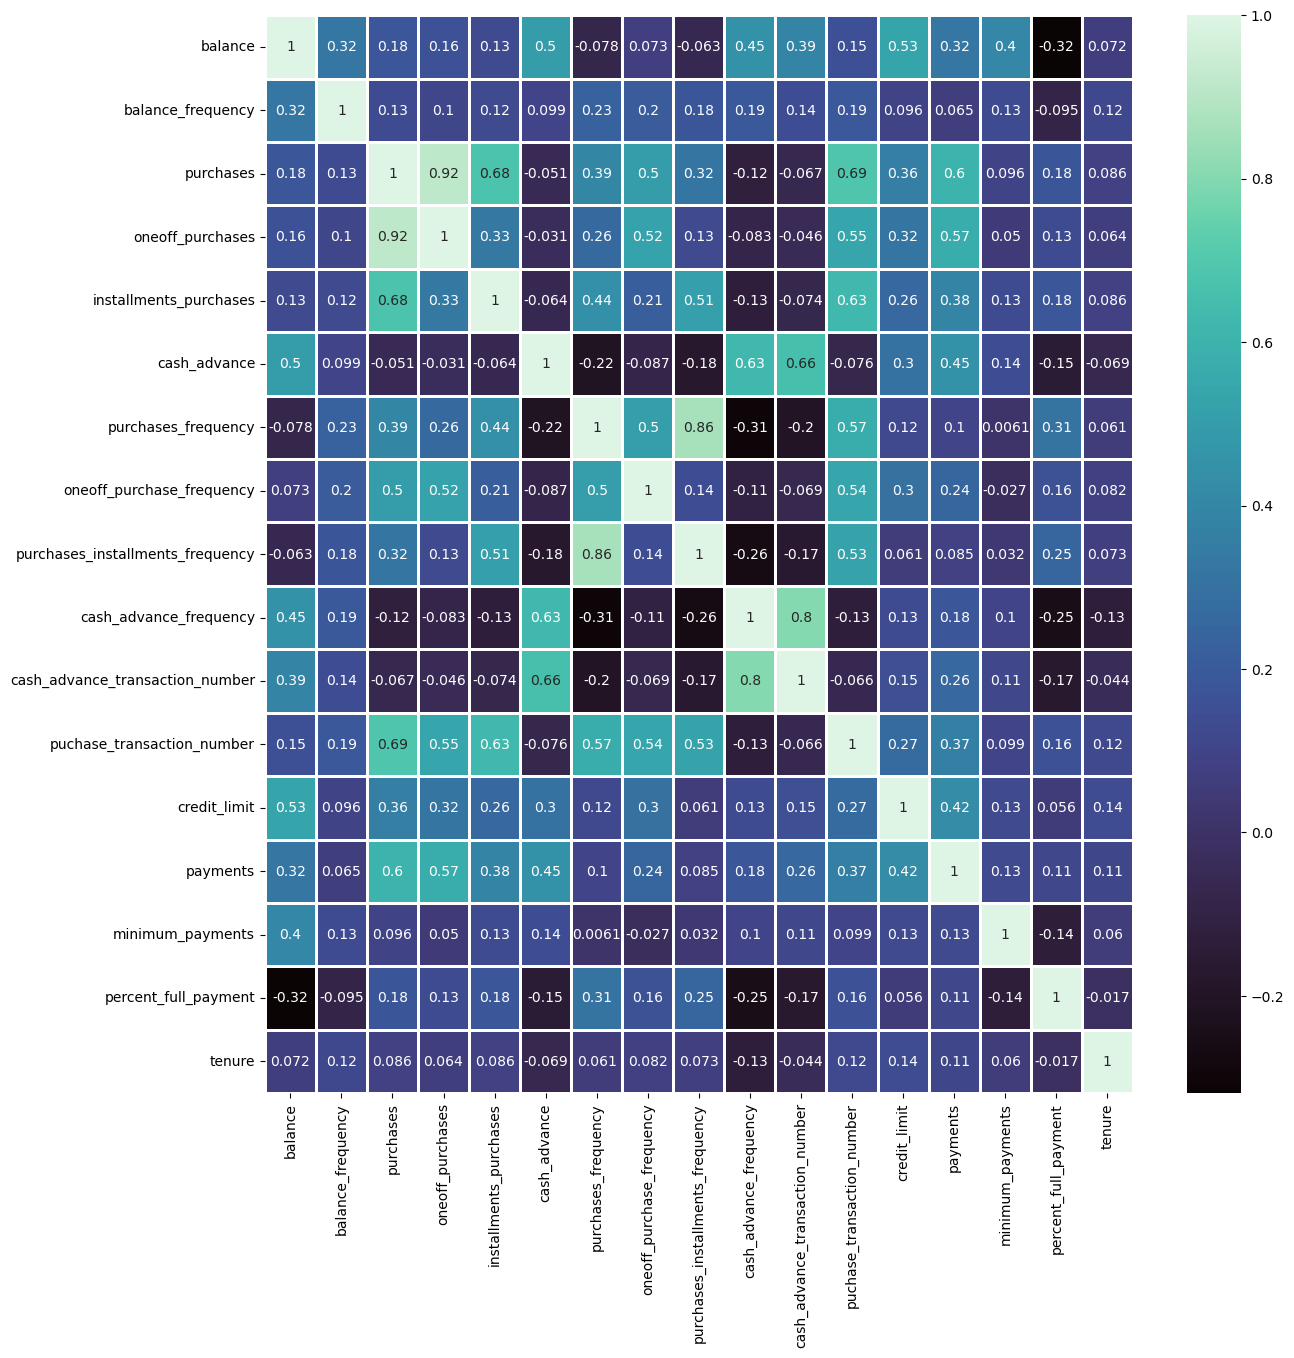

In [21]:
plt.figure(figsize=(14, 14))
sns.heatmap(data = df.corr(), annot = True,  cmap = "mako", linewidth=2)

* Some of the columns are highly correlated (correlation coefficients between 0.8 ~ 1.0)
* But it is not a problem for clustering, and it indicated that there would be some connected columns which benefit us to better group card users.

#### Split the columns into five parts

In [116]:
df.columns

Index(['balance', 'balance_frequency', 'purchase', 'oneoff_purchase',
       'installments_purchase', 'cash_advance', 'purchase_frequency',
       'oneoff_purchase_frequency', 'purchase_installment_frequency',
       'cash_advance_frequency', 'cash_advance_transaction_number',
       'purchase_transaction_number', 'credit_limit', 'payment',
       'minimum_payment', 'percent_full_payment', 'tenure'],
      dtype='object')

* behaviour: 'balance', 'balance_frequency', 'credit_limit', 'tenure',
* purchase type: 'purchase', 'oneoff_purchase', 'installments_purchase', 'cash_advance'
* purchase frequency:  'purchase_frequency', 'oneoff_purchase_frequency', 'purchase_installment_frequency', 'cash_advance_frequency', 'cash_advance_transaction_number', 'purchase_transaction_number', 
* payment: 'payment', 'minimum_payment', 'percent_full_payment'
* * Considering the business need of banks, tenure and credit limit are variables that controled by the bank. Therefore, they are attributes linked with strategy making and they will added into each group.

In [136]:
df_be = df[['balance', 'balance_frequency', 'credit_limit', 'tenure']]
df_pt = df[['purchase', 'oneoff_purchase', 'installment_purchase', 'cash_advance', 'credit_limit', 'tenure']]
df_pf = df[['purchase_frequency', 'oneoff_purchase_frequency', 'purchase_installment_frequency', 
            'cash_advance_frequency', 'cash_advance_transaction_number', 'purchase_transaction_number', 'credit_limit', 'tenure']]
df_pay = df[['payment', 'minimum_payment', 'percent_full_payment','credit_limit', 'tenure']]


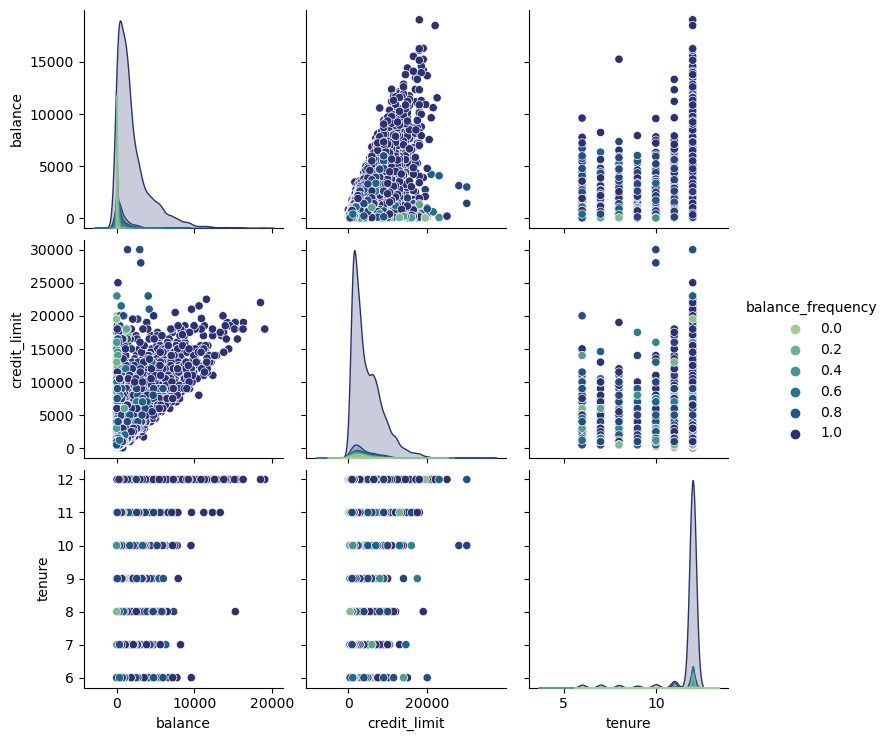

In [99]:
sns.pairplot(data=df_be, palette="crest", hue="balance_frequency")

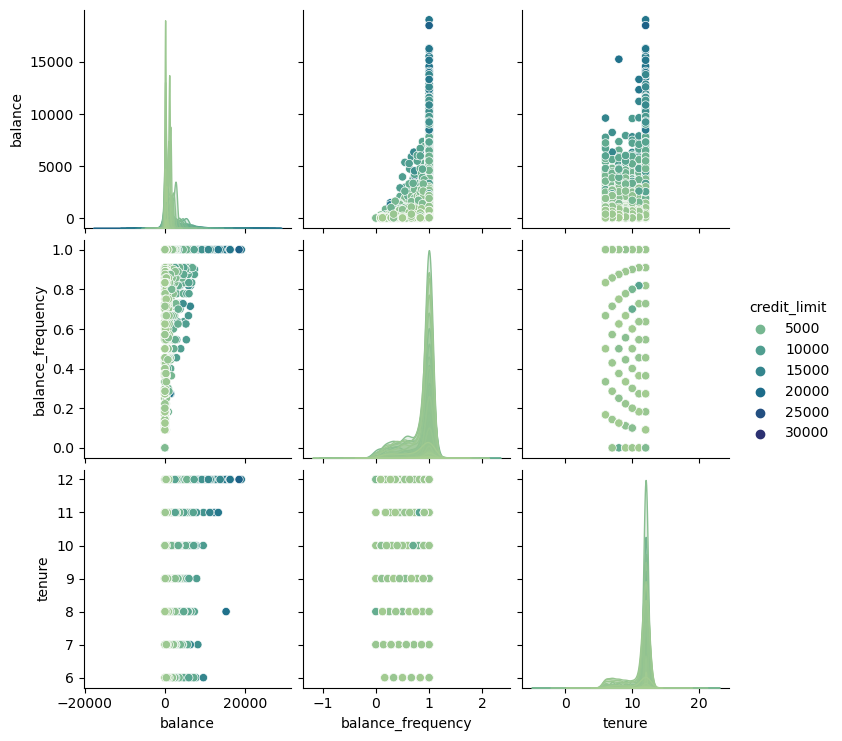

In [98]:
sns.pairplot(data=df_be, palette="crest", hue="credit_limit")

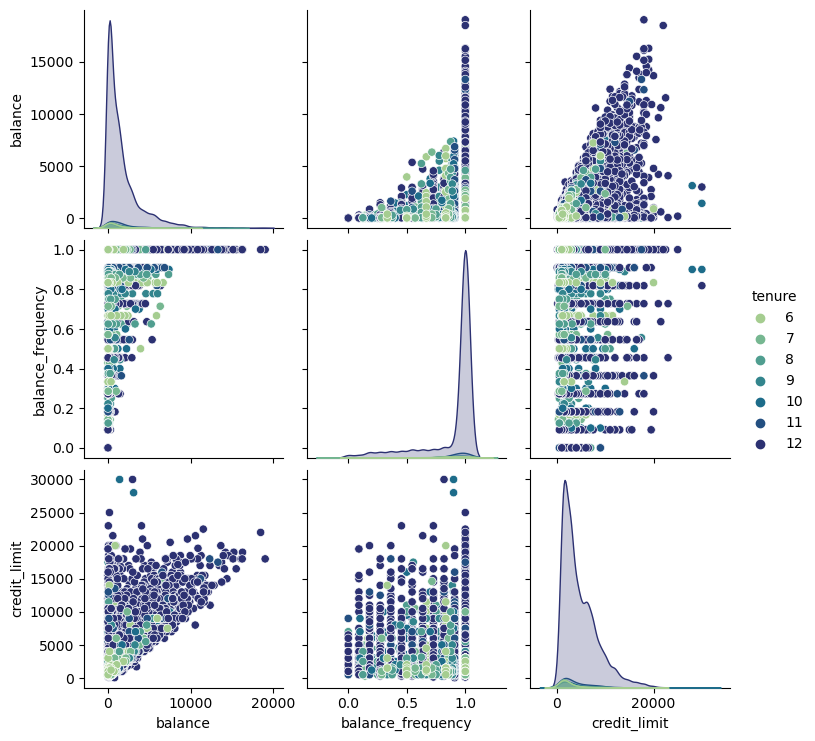

In [97]:
sns.pairplot(data=df_be, palette="crest", hue="tenure")

<AxesSubplot: >

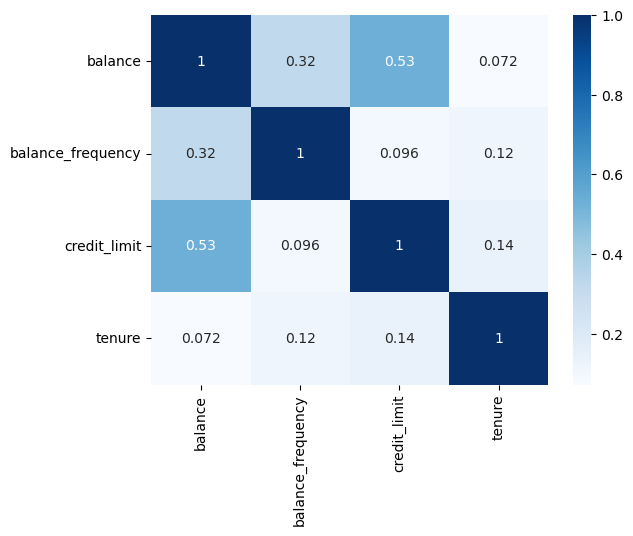

In [128]:
sns.heatmap(data=df_be.corr(), cmap="Blues", annot=True)

* Balance and credit limit are positively correlated.
* Balance and balance frequency are also highly correlated.
* From pairplot, longer tenure are correlated with both higher balance and higher balance frequency
##### Conclusion: 
* Users with higher balance amount left in the account tend to have a better money management habit and they are also more stable customers with longer tenure.

### Purchase type

In [129]:
df_pt.columns

Index(['purchase', 'oneoff_purchase', 'installment_purchase', 'cash_advance'], dtype='object')

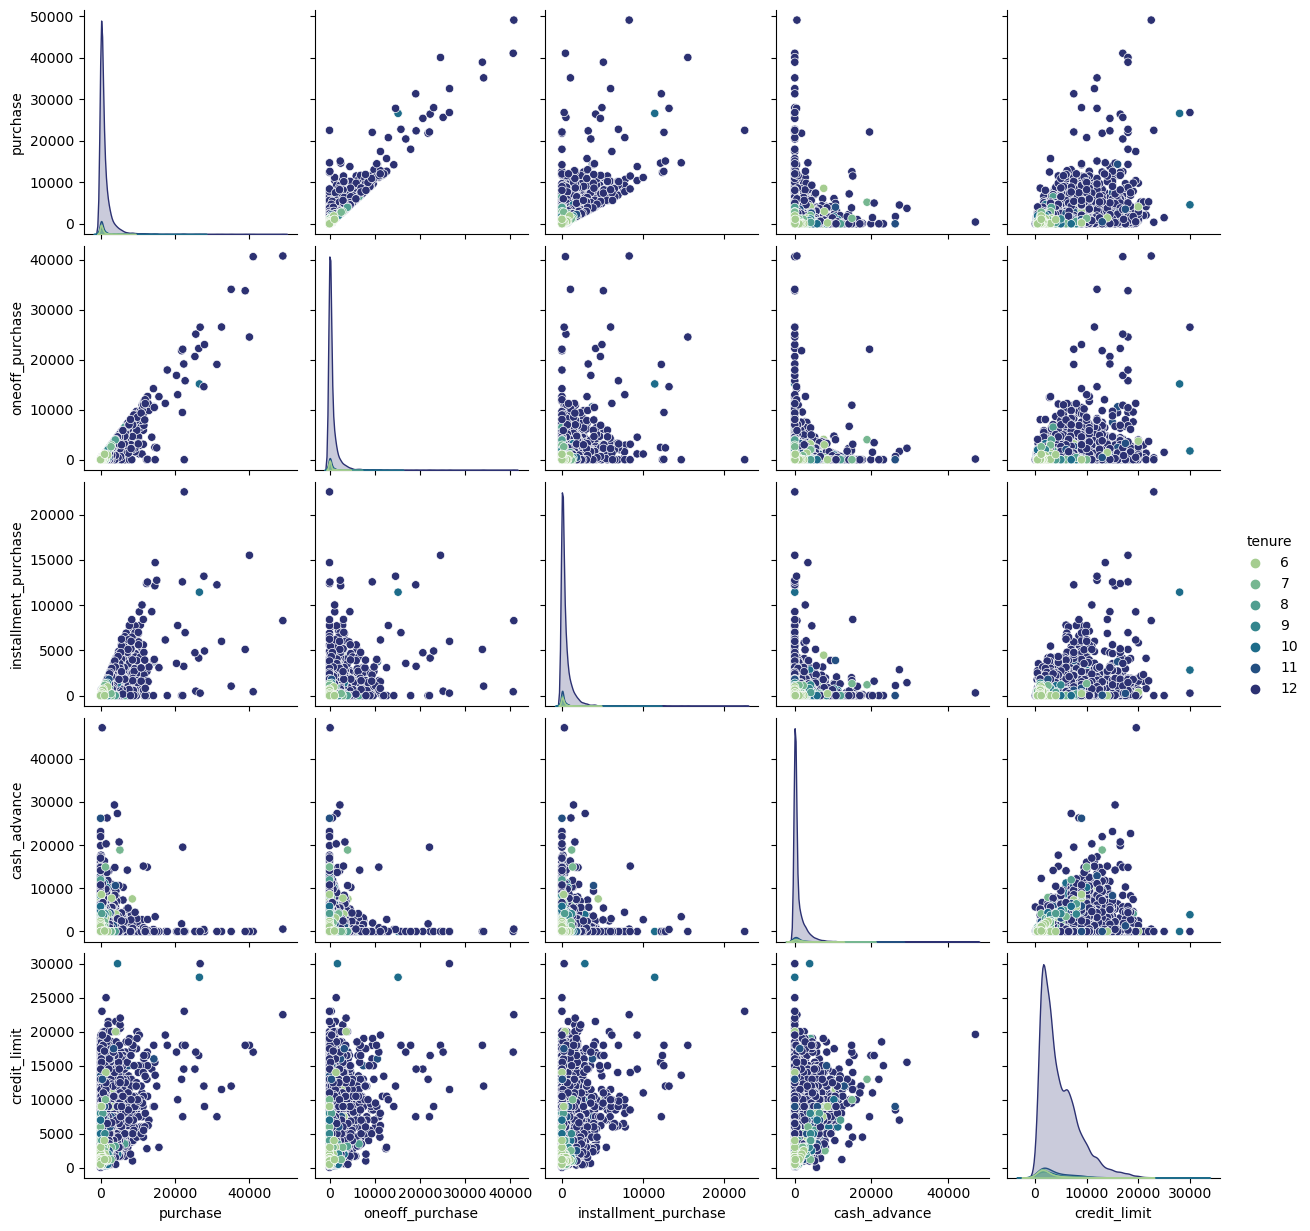

In [137]:
sns.pairplot(data = df_pt, hue="tenure", palette="crest")

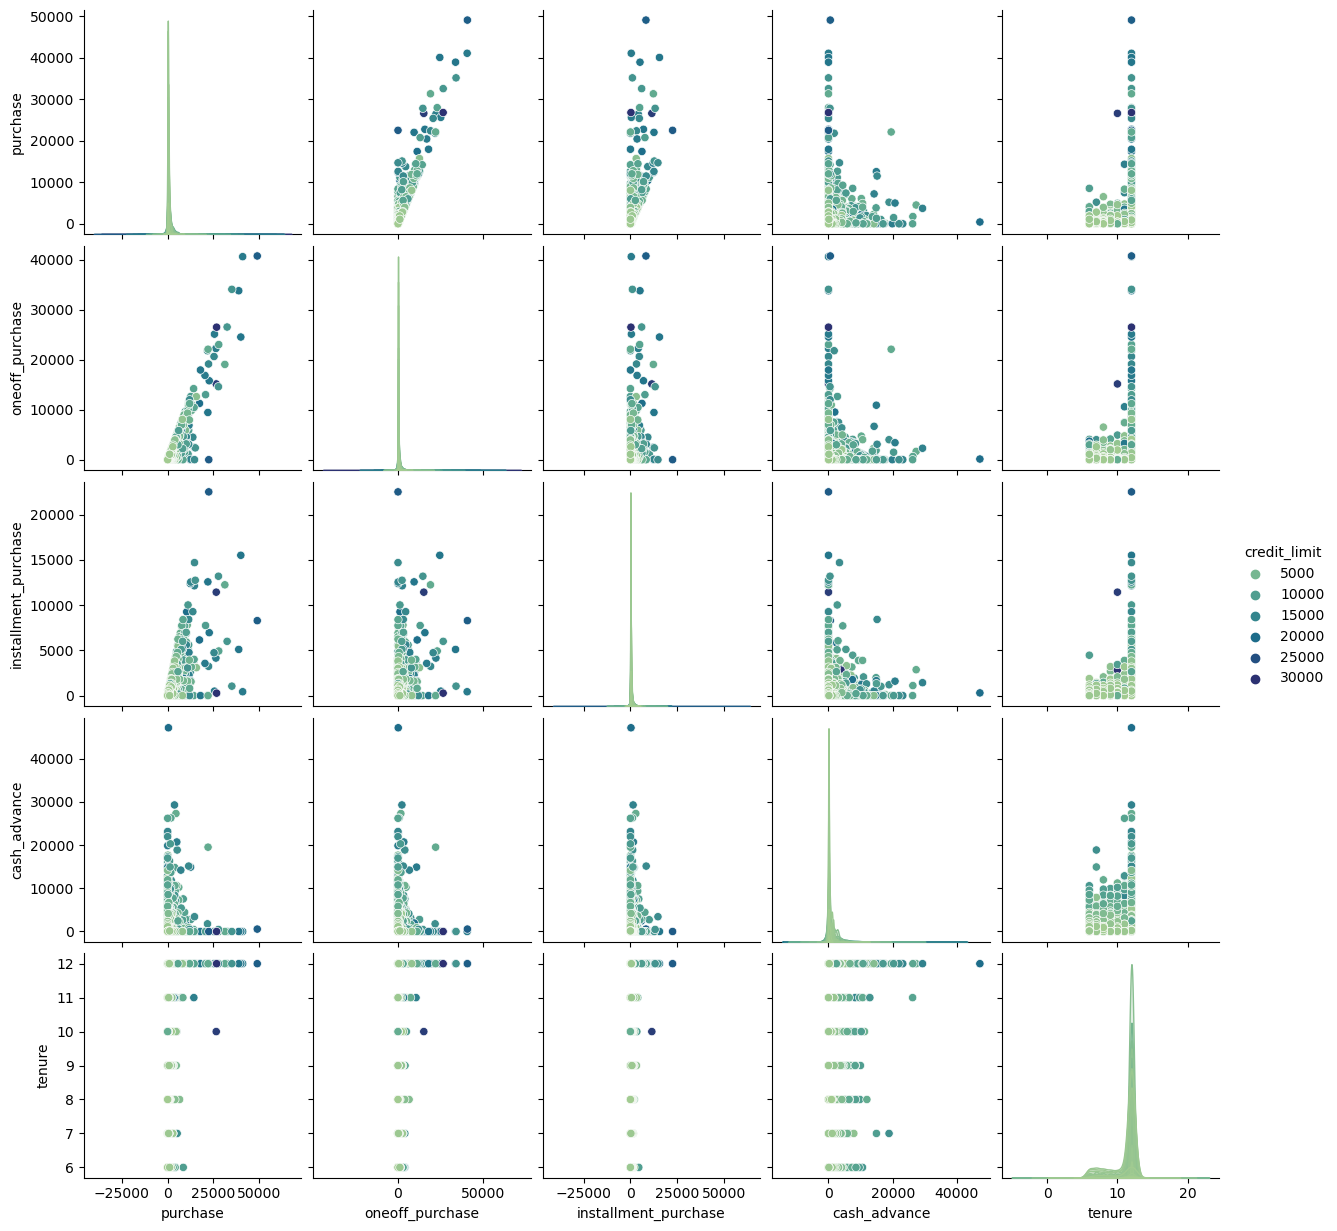

In [139]:
sns.pairplot(data = df_pt, hue="credit_limit", palette="crest")

In [141]:
df_pt.columns

Index(['purchase', 'oneoff_purchase', 'installment_purchase', 'cash_advance',
       'credit_limit', 'tenure'],
      dtype='object')

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(12, 8))
sns.set_context("notebook", font_scale=1.1)
axis_y = "percentage of users"
# Plot PhoneService column
pc = df_cb.groupby("PhoneService")["Churn"].value_counts()/len(df_cb)
pc = pc.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x="PhoneService", y=axis_y, hue="Churn", data=pc, ax=axis[0][0], palette = "mako")
# Plot Senior Citizen column
sc = df_cb.groupby(["MultipleLines"])["Churn"].value_counts()/len(df_cb)
sc = sc.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x="MultipleLines", y=axis_y, hue="Churn", data=sc, ax=axis[0][1], palette = "mako") 
# Plot InternetService column
p = df_cb.groupby('InternetService')["Churn"].value_counts()/len(df_cb)
p = p.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='InternetService', y= axis_y, hue='Churn', data=p, ax=axis[1][0],palette = "mako")
# Plot Contract column
d = df_cb.groupby('Contract')["Churn"].value_counts()/len(df_cb)
d = d.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Contract', y= axis_y, hue='Churn', data=d, ax=axis[1][1],palette = "mako")

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_figsize'

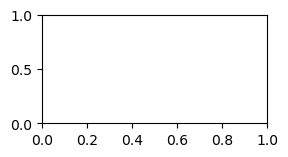

In [149]:
for n, col in enumerate(df_pt.columns):
    ax = plt.subplot(3, 2, n+1)
    plt.set_figsize(30, 20)
    sns.lineplot(data = df_pt, x=col, y = "purchase")
    

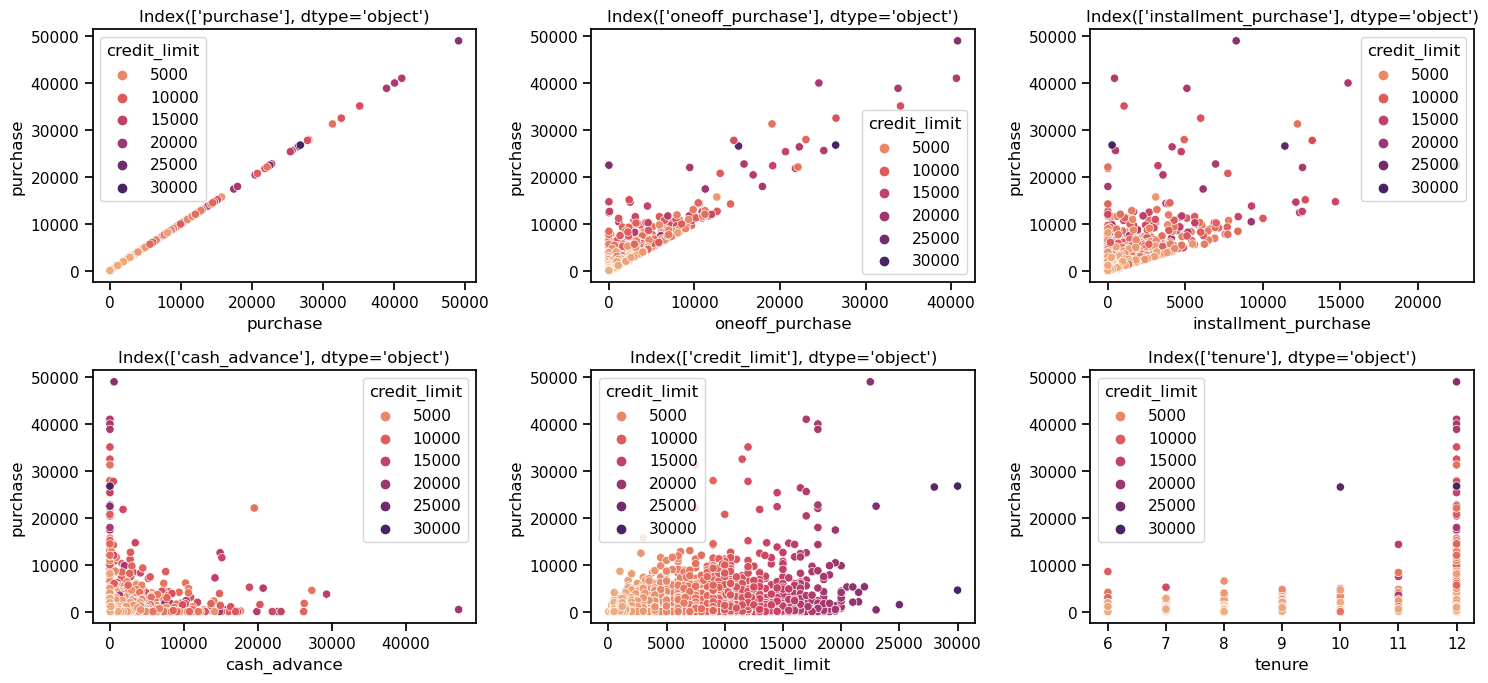

In [161]:
sns.set_context('notebook')
plt.figure(figsize=(15, 7))
for i in range(len(df_pt.columns)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x = df_pt.columns[i], y="purchase", data=df_pt, hue="credit_limit", palette="flare")
    plt.title(df_pt.columns[[i]])
plt.tight_layout()      

* purchase area:
    * oneoff purchase, installment purchase are positive related.
    * cash advance is negative related. It may indicate another kind of customer.
* credit limit:
    * higher credit limit customers tend to use more one-off purchase and installment purchase

KeyboardInterrupt: 

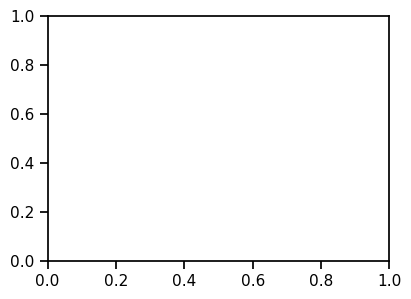

In [166]:
sns.set_context('notebook')
plt.figure(figsize=(15, 7))
for i in range(len(df_pt.columns)):
    plt.subplot(2,3,i+1)
    sns.barplot(x = df_pt.columns[i], y = 'purchase', bins=10, data=df_pt, hue="credit_limit", palette="flare")
    plt.title(df_pt.columns[[i]])
plt.tight_layout() 